In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
from functools import reduce

In [120]:
produtorio = lambda x,y : x*y

def lagrange(xys):
    xs,ys = zip(*xys)
    
    def l(k):
        def b(x):
            return reduce(produtorio,[(x-xi)/(xs[k]-xi) for i,xi in enumerate(xs) if i != k ],1)
        return b
    return lambda x: sum([y*l(k)(x) for k,y in enumerate(ys)])

In [183]:
x = linspace(-pi/2,pi/2,10)
y = sin(x)
y2 = exp(x)

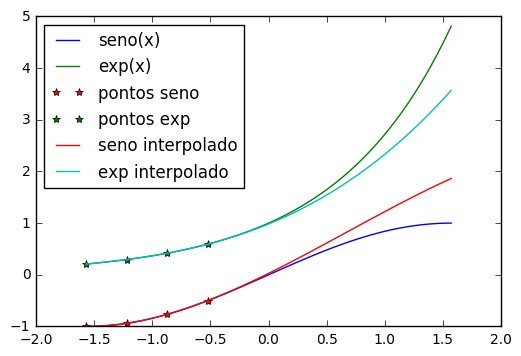

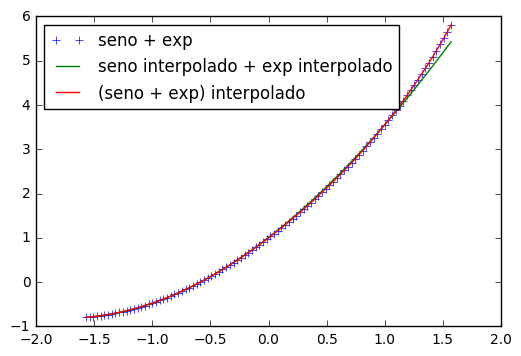

In [188]:
x_interp,y_interp,y2_interp = x[:4],y[:4],y2[:4]
l = lagrange(zip(x_interp,y_interp))
l2 = lagrange(zip(x_interp,y2_interp))

L = lambda x_l,lagr : array([lagr(xi) for xi in x_l])
Y = lambda X : sin(X)
Y2 = lambda X : exp(X)

#xlim(-pi/2,pi/2)
#ylim(-1.5,2)

figure(1)

x_plot = linspace(-pi/2,pi/2,100)
plot(x_plot,Y(x_plot),label='seno(x)')
plot(x_plot,Y2(x_plot),label='exp(x)')

plot(x_interp,y_interp,'r*',label='pontos seno')
plot(x_interp,y2_interp,'g*',label='pontos exp')

x_polyn = linspace(-pi/2,pi/2,100)
plot(x_polyn,L(x_polyn,l),label='seno interpolado')
plot(x_polyn,L(x_polyn,l2),label='exp interpolado')
legend(loc=0);

figure(2)

l_soma = lagrange(zip(x,y+y2))

plot(x_plot, Y(x_plot)+Y2(x_plot), '+', label='seno + exp')
plot(x_polyn,L(x_polyn,l) + L(x_polyn,l2),label='seno interpolado + exp interpolado')
plot(x_polyn,L(x_polyn,l_soma),label='(seno + exp) interpolado')
legend(loc=0);